<a href="https://colab.research.google.com/github/murphybrendan/code-concepts/blob/main/reinforcement_learning/01_intro/01_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reinforcement learning is a field of machine learning where *agents* are trained to *maximize their cumulative reward* from their environment. You can think of this like playing a video game where you want to get the highest score possible. So, let's do exactly that!

In [5]:
!sudo apt-get update
!sudo apt-get install -y python3-opengl
!apt install ffmpeg
!apt install xvfb
!pip3 install pyvirtualdisplay

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-opengl is already the newest version (3.1.5+dfsg-1).
0 upgraded, 0 newly installed, 0 to remove and 55 not upgraded.
Reading packa

In [4]:
!pip install gymnasium[toy_text] stable_baselines3[extra]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.3/182.3 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 27.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 26.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvid

Let's play a game. The object of the game is to reach the goal without falling off the cliff.

In [5]:
import gymnasium as gym
env = gym.make('CliffWalking-v0', render_mode="rgb_array")

You're only able to take 1 of 4 actions: move up, down, left, right.

In [27]:
env.action_space

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Discrete(4)

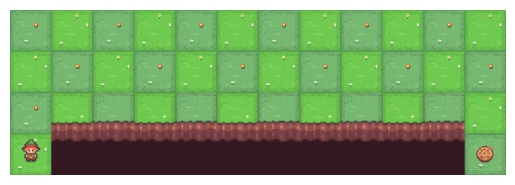

In [6]:
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

observation, info = env.reset()

def display_frame(frame):
    plt.imshow(frame)
    plt.axis('off')
    display(plt.gcf())
    clear_output(wait=True)

display_frame(env.render())

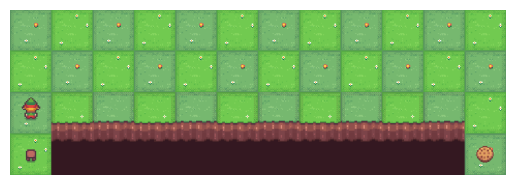

In [26]:
action = env.action_space.sample()
env.step(action)
display_frame(env.render())

In [8]:
timesteps = 100
observation, info = env.reset()
frames = []

for _ in range(timesteps):
    frames.append(env.render())
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    if terminated or truncated:
        observation, info = env.reset()

In [18]:
%matplotlib inline
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def animate(frames):
    fig, ax = plt.subplots()
    ax.axis('off')
    im = ax.imshow(frames[0])

    def update(frame):
        im.set_array(frame)
        return [im]

    ani = FuncAnimation(fig, update, frames=frames, interval=50, blit=True)

    video = HTML(ani.to_html5_video())
    plt.close(fig)
    return video

animate(frames)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
def train(timesteps):
    observation, info = env.reset()
    rewards = []
    cumulative_reward = 0
    for _ in range(timesteps):
        frames.append(env.render())
        action = env.action_space.sample()
        observation, reward, terminated, truncated, info = env.step(action)
        cumulative_reward += reward
    return cumulative_reward, frames

cumulative_reward, frames = train(100)
print(f"Return: {cumulative_reward}")
animate(frames)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Return: -1090


In [ ]:
class RandomAgent

    def __init__(self, env):
        self.env = env

    def predict(self, observation):
        return self.env.action_space.sample()

    def learn(self, timesteps):
        observation, info = env.reset()
        for _ in range(timesteps):
            action = self.predict(observation)
            observation, reward, terminated, truncated, info = env.step(action)
            if terminated or truncated:
                observation, info = env.reset()